<a href="https://colab.research.google.com/github/sharibhumayun/twitter-sentiment-analysis/blob/main/LIVE_Twitter_Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tweepy
from tweepy import OAuthHandler

In [3]:
# 2.Set Connecion

#Get from developers.twitter.com/App->Setting->keys&tokens
#Just assign the credentials

consumer_key = "crDV40i0SON24wcGU6utpeDyB"
consumer_secret = "sTDDpPwRPEGms4K11ozOqZi7tF6YUWC5BbCz0pb9ec5A5o3PMh"
access_token = "1860755455-aleOYVMgLQ3ZL5bjJBzQpDMki8hXbyTuaMpNDOD"
access_token_secret = "LwVi1nkRvi42pfF4PoAE8lNwMxQrXTavMD6ndkIxoM8ex"



# Use the above credentials to authenticate the API.

auth = tweepy.OAuthHandler( consumer_key , consumer_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

In [4]:
df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


In [5]:
# 4.Write a Function to extract tweets:

# We will Use **tweepy.cursor()** because we want to extract a larger number of tweets i.e over 100,500 etc


def get_tweets(Topic,Count):    
    i=0
    for tweet in tweepy.Cursor(api.search, q=Topic,count=1000, lang="en",exclude='retweets').items():
        print(i, end='\r')
        df.loc[i,"Date"] = tweet.created_at
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        #df.to_csv("TweetDataset.csv",index=False)
        df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
        i=i+1
        if i>Count:
            break
        else:
            pass

In [8]:
# Call the function to extract the data. pass the topic and filename you want the data to be stored in.
Topic=["abortion law"]
get_tweets(Topic , Count=1000)

In [9]:
df.head(10)

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2022-06-24 19:49:08,"Cassie, Lucy's marshmallow",False,@M1narc Law that prevented the outlawing of ab...,0,0,
1,2022-06-24 19:49:08,Brian,False,@AOC abortion rights will result only when equ...,0,0,
2,2022-06-24 19:49:07,PrideLS 🌈🇺🇦🏳️‍🌈🏳️‍⚧️❤️🧡💛💚💙💜💖,False,I noticed that everyone over in the US is hear...,0,0,"Cambridge, England, UK 🇬🇧"
3,2022-06-24 19:49:07,Lydia Hale,False,@_brennacolleen @proachaddix @epicciuto My sta...,0,0,United States
4,2022-06-24 19:49:06,Kenny Powers,False,If y’all wasn’t busy talking about who should ...,0,0,
5,2022-06-24 19:49:06,MoodyRedhead,False,@RepShontelBrown No. You're absolutely incorre...,0,0,"Down South, y’all"
6,2022-06-24 19:49:05,THE VIBE✨,False,Nah this abortion law shit is really insane li...,0,0,"Dallas, TX"
7,2022-06-24 19:49:05,Aries Boy,False,@KirstieMAllsopp @Adrian_Hilton You object to ...,0,0,
8,2022-06-24 19:49:03,Diane from Lower Akron went to Labor Notes,False,"@adriawalkr Yes! Like, asking, should your sta...",0,0,Northeast Ohio
9,2022-06-24 19:49:02,Frank Morano,True,"Whether it's guns, abortion, school funding or...",0,0,"Staten Island, NY"


In [10]:
 #Function to Clean the Tweet.

import re
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

# We only want the Text so :

# (@[A-Za-z0-9]+)   : Delete Anything like @hello @Letsupgrade etc
# ([^0-9A-Za-z \t]) : Delete everything other than text,number,space,tabspace
# (\w+:\/\/\S+)     : Delete https://
# ([RT]) : Remove "RT" from the tweet

In [11]:
# Funciton to analyze Sentiment

from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [12]:
#Function to Pre-process data for Worlcloud:here we are removing the words present in Topic from the Corpus so they dont come in WordCloud.
# Ex : Topic is "Arsenal vs United", we want to remove "Arsenal" "vs" "United" from the WordCloud.

def prepCloud(Topic_text,Topic):
    Topic = str(Topic).lower()
    Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
    Topic = re.split("\s+",str(Topic))
    stopwords = set(STOPWORDS)
    stopwords.update(Topic) ### Add our topic in Stopwords, so it doesnt appear in wordClous
    ###
    text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])
    return text_new

In [13]:
# Call function to get Clean tweets

df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet
0,2022-06-24 19:49:08,"Cassie, Lucy's marshmallow",False,@M1narc Law that prevented the outlawing of ab...,0,0,,law that prevented the outlawing of abortion w...
1,2022-06-24 19:49:08,Brian,False,@AOC abortion rights will result only when equ...,0,0,,abortion rights will result only when equality...
2,2022-06-24 19:49:07,PrideLS 🌈🇺🇦🏳️‍🌈🏳️‍⚧️❤️🧡💛💚💙💜💖,False,I noticed that everyone over in the US is hear...,0,0,"Cambridge, England, UK 🇬🇧",i noticed that everyone over in the us is hear...
3,2022-06-24 19:49:07,Lydia Hale,False,@_brennacolleen @proachaddix @epicciuto My sta...,0,0,United States,brennacolleen my state passed a law that abort...
4,2022-06-24 19:49:06,Kenny Powers,False,If y’all wasn’t busy talking about who should ...,0,0,,if y all wasn t busy talking about who should ...


In [14]:
# Call function to get the Sentiments

df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet,Sentiment
0,2022-06-24 19:49:08,"Cassie, Lucy's marshmallow",False,@M1narc Law that prevented the outlawing of ab...,0,0,,law that prevented the outlawing of abortion w...,Neutral
1,2022-06-24 19:49:08,Brian,False,@AOC abortion rights will result only when equ...,0,0,,abortion rights will result only when equality...,Neutral
2,2022-06-24 19:49:07,PrideLS 🌈🇺🇦🏳️‍🌈🏳️‍⚧️❤️🧡💛💚💙💜💖,False,I noticed that everyone over in the US is hear...,0,0,"Cambridge, England, UK 🇬🇧",i noticed that everyone over in the us is hear...,Neutral
3,2022-06-24 19:49:07,Lydia Hale,False,@_brennacolleen @proachaddix @epicciuto My sta...,0,0,United States,brennacolleen my state passed a law that abort...,Neutral
4,2022-06-24 19:49:06,Kenny Powers,False,If y’all wasn’t busy talking about who should ...,0,0,,if y all wasn t busy talking about who should ...,Positive


In [33]:
# Check Summary of Random Record
n = 785
print("Original tweet:\n",df['Tweet'][n])
print()
print("Clean tweet:\n",df['clean_tweet'][n])
print()
print("Sentiment of the tweet:\n",df['Sentiment'][n])

Original tweet:
 @kellialexis As mentioned,the law goes into states hands,so I’m sure democratic states will be okay, but those in r… https://t.co/JWGY1Xpwce

Clean tweet:
 as mentioned the law goes into states hands so i m sure democratic states will be okay but those in r

Sentiment of the tweet:
 Positive


In [16]:
# Overall Summary

print("Total Tweets Extracted for Topic : {} are : {}".format(Topic,len(df.Tweet)))
print("Total Positive Tweets are : {}".format(len(df[df["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(df[df["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(df[df["Sentiment"]=="Neutral"])))

Total Tweets Extracted for Topic : ['abortion law'] are : 1001
Total Positive Tweets are : 352
Total Negative Tweets are : 214
Total Neutral Tweets are : 435


In [17]:
df["Sentiment"].value_counts()

Neutral     435
Positive    352
Negative    214
Name: Sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Summary of Counts for Total tweets')

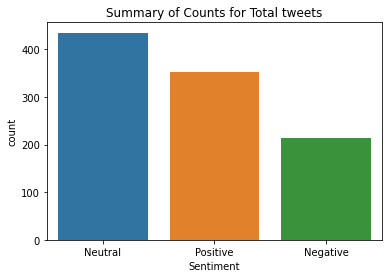

In [18]:
#sns.countplot(df["Sentiment"],facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))
sns.countplot(df["Sentiment"])
plt.title("Summary of Counts for Total tweets")

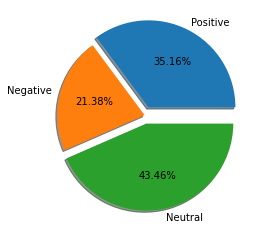

In [19]:
# Piechart 
#string, used to label the wedges with their numeric value. The label will be placed inside the wedge. The format string will be fmt%pct.

a=len(df[df["Sentiment"]=="Positive"])
b=len(df[df["Sentiment"]=="Negative"])
c=len(df[df["Sentiment"]=="Neutral"])
d=np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not')

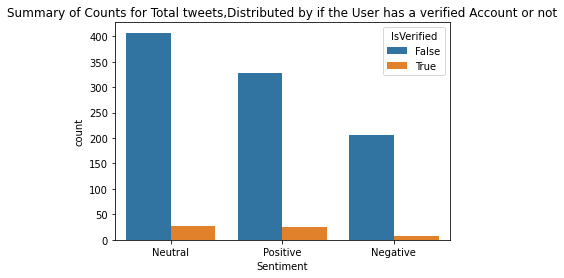

In [20]:
sns.countplot(df["Sentiment"],hue=df.IsVerified)
plt.title("Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not")

In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

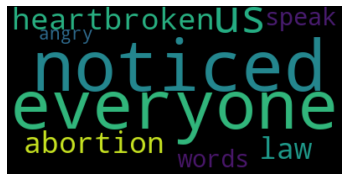

In [25]:
# Start with one review:

text = df.clean_tweet[2]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=10).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 94675 words in the combination of all review.


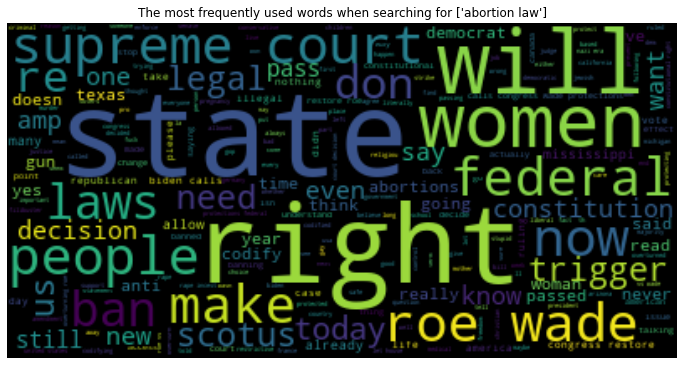

In [26]:
# Combine all reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text = " ".join(review for review in df.clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

text_newALL = prepCloud(text,Topic)


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_newALL)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic),)
plt.axis("off")
plt.show()

There are 94675 words in the combination of all review.


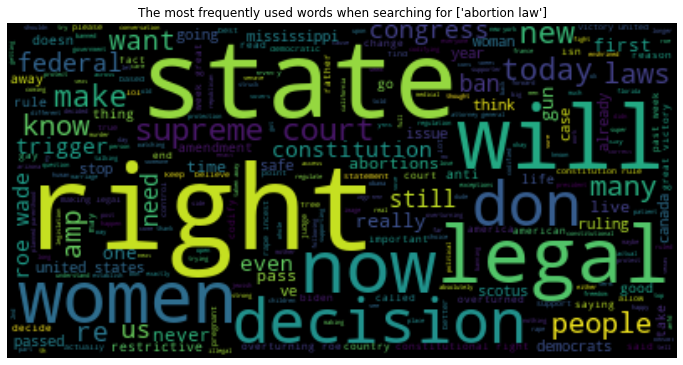

In [27]:
# Combine POSITIVE reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text_positive = " ".join(review for review in df[df["Sentiment"]=="Positive"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords
#text_positive=" ".join([word for word in text_positive.split() if word not in stopwords])

text_new_positive = prepCloud(text_positive,Topic)

#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_positive)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()

There are 94675 words in the combination of all review.


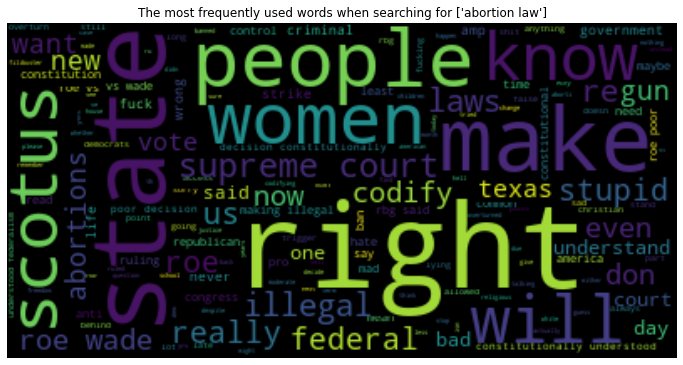

In [28]:
# Combine Negative reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text_negative = " ".join(review for review in df[df["Sentiment"]=="Negative"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

#text_negative=" ".join([word for word in text_negative.split() if word not in stopwords])
text_new_negative = prepCloud(text_negative,Topic)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_negative)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()